In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Shape of dataset is 614 X 13. Loan ID is to be removed. All other data apart from Applicantincome, Coapplicantincome Loan_Amount_term and Loan_Amount are categorical - need to be encoded. There is missing data that needs to be imputed too.

In [56]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We'll figure out what to do of each missing data upon finding out the correlation with the target variable. 

In [57]:
df = df.drop('Loan_ID', axis = 1)

In [58]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Loan_Amount_Term na values will be filled up with the mode.  

In [59]:
df1 = df.copy()

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [61]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
for i in df1:
    if (df1[i].dtypes != 'float64' and df1[i].dtypes != 'int64'):
        s1 = lenc.fit_transform(df1[i])
        s1 = pd.DataFrame(s1)
        df1[i] = s1
    else:
        continue
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [62]:
df1.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

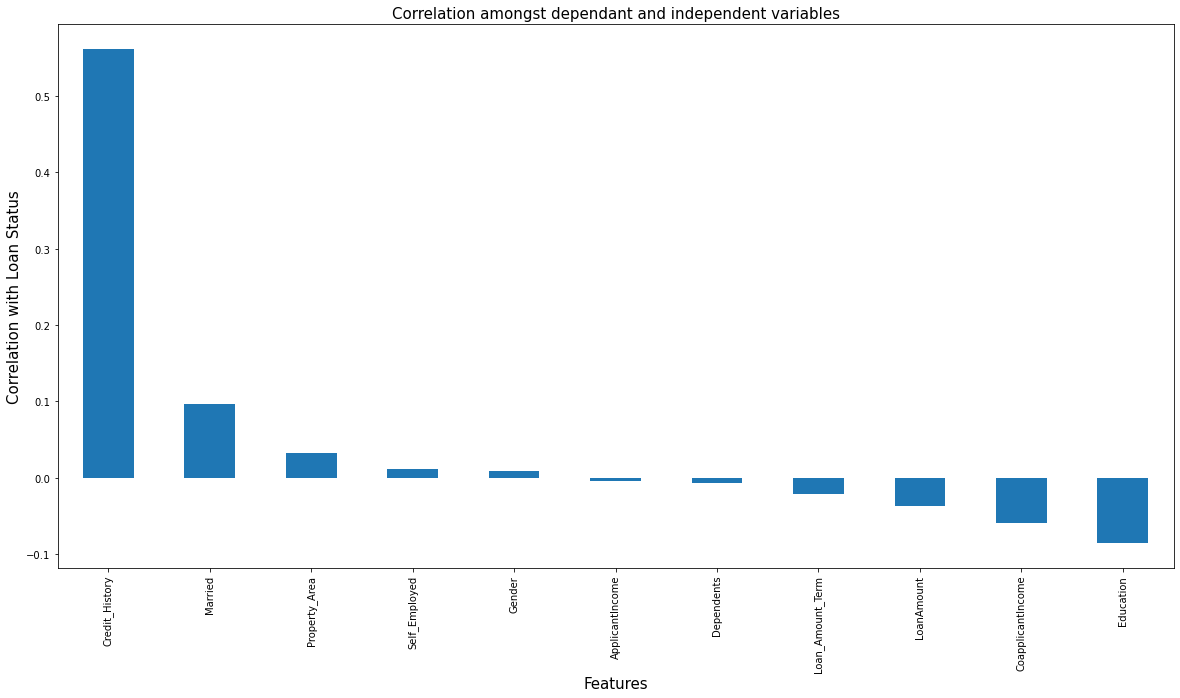

In [63]:
df2 = df1.corr()
plt.figure(figsize=(20,10))
df2['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Correlation with Loan Status', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()

There is very little correlation with all apart from credit history, marriage status, loan amount and education.  

<AxesSubplot:>

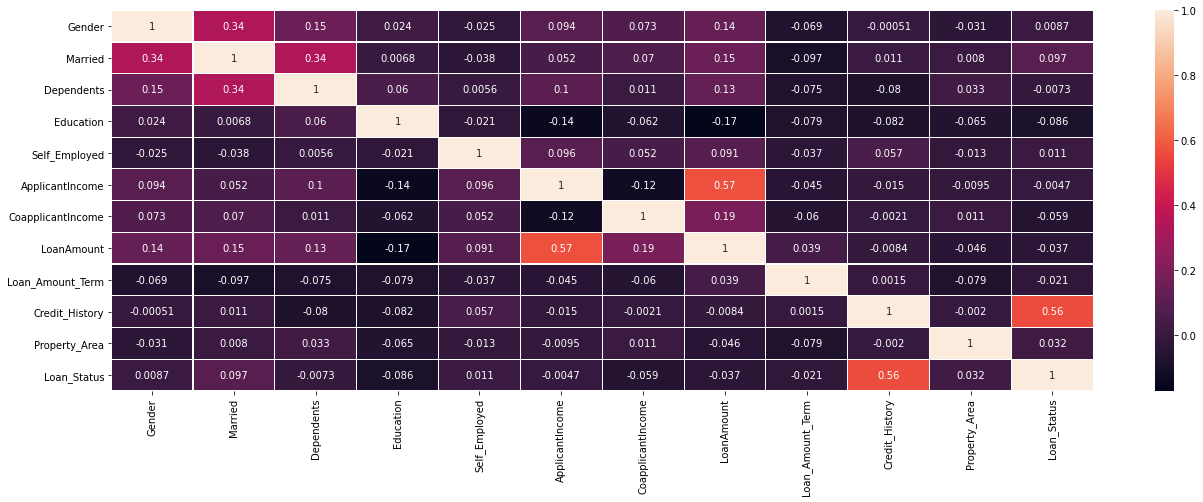

In [64]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.corr(), annot=True, linewidths=0.1)

There is high correlation between loan amount and applicant income . We can impute the data based on their correlation. We can put mean for term and encode credit history's missing data as 0 as 0 indicates that there is no credit history anyway.  

In [65]:
df1['Credit_History'] = df1['Credit_History'].fillna(0)

In [66]:
df1['Credit_History'].isna().sum()

0

In [67]:
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(360)

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
itim = IterativeImputer()
df1['LoanAmount'] = itim.fit_transform(df1[['ApplicantIncome', 'LoanAmount']])[:,1]

In [70]:
(df['LoanAmount'] == df1['LoanAmount']).sum()

592

All data is without missing values. Going ahead to check for skewness of continuous variables, multicollinearity and KBest variables

In [74]:
vif1 = pd.DataFrame()
Xsc = np.asarray(df1)
vif1['score'] = [variance_inflation_factor(Xsc,i) for i in range (Xsc.shape[1])]
vif1['Feature'] = df1.columns
vif1

,score,Feature
0,5.371364,Gender
1,3.617827,Married
2,1.806254,Dependents
3,1.305072,Education
4,1.212921,Self_Employed
5,2.945880,ApplicantIncome
6,1.483587,CoapplicantIncome
7,6.895348,LoanAmount
8,9.536276,Loan_Amount_Term
9,5.241358,Credit_History


In [75]:
X = df1.drop('Loan_Status', axis=1)
y = df1['Loan_Status']
from sklearn.feature_selection import SelectKBest, f_classif
bf= SelectKBest(score_func = f_classif, k='all')
fit = bf.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature name', 'Score']
print(feature_scores.nlargest(14,'Score'))

         Feature name       Score
9      Credit_History  140.912799
1             Married    5.771607
3           Education    4.547685
6   CoapplicantIncome    2.151457
7          LoanAmount    0.816593
10      Property_Area    0.631733
8    Loan_Amount_Term    0.311334
4       Self_Employed    0.072455
0              Gender    0.046215
2          Dependents    0.032777
5     ApplicantIncome    0.013574


From the above vif and SelectKBest data, removing 'Loan_Amount_Term' 

In [77]:
df1 = df1.drop('Loan_Amount_Term', axis = 1)

In [78]:
df1.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.707488
Credit_History      -1.310835
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

ApplicantIncome, LoanAmount & CoapplicantIncome - All have high skew. Applying z score filter and then yeo johnson filter to the dataset.

In [89]:
from scipy.stats import zscore
z=np.abs(zscore(df1.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 
                        'Loan_Status'], axis = 1)))
dfn = df1[(z<3).all(axis=1)]
dfn.shape

(589, 11)

In [90]:
dfn.skew()

Gender              -1.002998
Married             -0.521379
Dependents           1.122419
Education            1.303332
Self_Employed        2.262000
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.080695
Credit_History      -1.314930
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

Skew is highly reduced but it still exists. Applying yeo 

In [91]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
dfn1 = power.fit_transform(dfn.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 
                        'Loan_Status'], axis = 1))
dfn1 = pd.DataFrame(dfn1)
dfn1.columns = dfn.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 
                        'Loan_Status'], axis = 1).columns
dfn.index = dfn1.index
for i in dfn1:
    dfn[i] = dfn1[i]
    
dfn.skew()

Gender              -1.002998
Married             -0.521379
Dependents           1.122419
Education            1.303332
Self_Employed        2.262000
ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.057841
Credit_History      -1.314930
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

Skew removed. Going forward with the analysis post checking the balance.

In [94]:
dfn['Loan_Status'].value_counts()
#Data is imbalanced. We'll have to enter dummy data

1    407
0    182
Name: Loan_Status, dtype: int64

In [95]:
X = dfn.drop('Loan_Status', axis=1)
y = dfn['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23, shuffle = True, stratify = y)
!pip install imblearn
!pip install delayed 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)
dtc = DecisionTreeClassifier()
lreg = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
dtc.fit(X_train_new, y_train_new)
lreg.fit(X_train_new, y_train_new)
rfc.fit(X_train_new, y_train_new)
knc.fit(X_train_new, y_train_new)
print(dtc.score(X_test,y_test), lreg.score(X_test,y_test), rfc.score(X_test,y_test), knc.score(X_test,y_test))

0.6216216216216216 0.7702702702702703 0.7094594594594594 0.5945945945945946


Logistic regression is the most accurate model. Checking for cross validation score.  

In [96]:
print(cross_val_score(dtc, X, y, cv=10).mean())
print(cross_val_score(rfc, X, y, cv=10).mean())
print(cross_val_score(knc, X, y, cv=10).mean())
print(cross_val_score(lreg, X, y, cv=10).mean())

0.6638223261250731
0.7504967855055523
0.7182057276446522
0.7725891291642315


Logistic regression is the best model as it enjoys least difference of actual and CV score. However, the accuracy is low. Removing low K score / correaltion data

In [101]:
X1 = X.drop(['ApplicantIncome', 'Dependents', 'Gender', 'Self_Employed', 'Property_Area'], axis = 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.25, random_state = 23, shuffle = True, stratify = y)
X1_train_new, y1_train_new = sm.fit_sample(X1_train, y1_train)
dtc1 = DecisionTreeClassifier()
lreg1 = LogisticRegression()
rfc1 = RandomForestClassifier()
knc1 = KNeighborsClassifier()
dtc1.fit(X1_train_new, y1_train_new)
lreg1.fit(X1_train_new, y1_train_new)
rfc1.fit(X1_train_new, y1_train_new)
knc1.fit(X1_train_new, y1_train_new)
print(dtc1.score(X1_test,y1_test), lreg1.score(X1_test,y1_test), rfc1.score(X1_test,y1_test), knc1.score(X1_test,y1_test))

0.7094594594594594 0.7905405405405406 0.7094594594594594 0.6554054054054054


In [102]:
print(cross_val_score(dtc1, X1, y, cv=10).mean())
print(cross_val_score(rfc1, X1, y, cv=10).mean())
print(cross_val_score(knc1, X1, y, cv=10).mean())
print(cross_val_score(lreg1, X1, y, cv=10).mean())

0.6656341320864991
0.7130333138515489
0.7437171244886032
0.7777030976037406


Logistic regression is the best model as it enjoys least difference of actual and CV score. Performing GridSearchCV on it.

In [112]:
from sklearn.model_selection import GridSearchCV
params = {'penalty': ['l1', 'l2'],
          'dual': [True, False],
          'C': np.logspace(-4, 4, 1000),
         'fit_intercept': [True, False],
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grd = GridSearchCV(lreg1, param_grid = params)
grd.fit(X1_train_new, y1_train_new)
print(grd.best_params_)

{'C': 542.9186177618943, 'dual': True, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}


In [113]:
lreg2 = grd.best_estimator_
lreg2.fit(X1_train_new, y1_train_new)
lreg2.score(X1_test,y1_test)

0.8108108108108109

Accuracy is above 80%. Saving the model

In [114]:
filename = 'Loan.pickle'
pickle.dump(lreg2, open(filename, 'wb'))